This code checks when we run into an infinite loop vs when we reach a redundant box

In [ ]:
import random

# Function to generate a random number and populate the box
def initialize_box():
    size = random.randint(1, 5)  # Random size of the box
    box = []
    type_1 = random.randint(0, size)
    for _ in range(type_1):
        box.append('A')
    type_2 = random.randint(0, size - type_1)
    for _ in range(type_2):
        box.append('B')
    type_3 = size - type_1 - type_2
    for _ in range(type_3):
        box.append('C')
    return box

In [ ]:
# Function to randomly choose pairs and update the box until equilibrium
def update_box(box):
    boxes = []  # List to store boxes from each iteration
    iterations = 0  # Counter for the number of iterations
    while True:
        # Append the current box to the list
        boxes.append(box.copy())
        
        # Check if all elements in the box are the same
        if len(set(box)) == 1:
            print('You have reached the redundant equilibrium stage after', iterations, 'iterations.')
            break
        
        # Increment the iteration counter
        iterations += 1
        
        # Check if maximum iterations reached
        if iterations >= 60:  # Set a maximum number of iterations
            print('The algorithm entered an infinite loop.')
            break
        
        # Randomly choose two distinct indices
        index1, index2 = random.sample(range(len(box)), 2)
        
        # Replace the pair based on the rules
        if (box[index1], box[index2]) in [('A', 'B'), ('B', 'A')]:
            # Replace the pair with 'C'
            box[index1] = 'C'
            box[index2] = 'C'
        elif (box[index1], box[index2]) in [('A', 'C'), ('C', 'A')]:
            # Replace the pair with 'B'
            box[index1] = 'B'
            box[index2] = 'B'
        elif (box[index1], box[index2]) in [('B', 'C'), ('C', 'B')]:
            # Replace the pair with 'A'
            box[index1] = 'A'
            box[index2] = 'A'

    return boxes, iterations

In [17]:
# Initialize the box
box = initialize_box()
print("Initial Box:", box)

# Update the box until equilibrium
updated_boxes, iterations = update_box(box.copy())

print('The final box is:', updated_boxes[-1])

Initial Box: ['A', 'A', 'C', 'C']
You have reached the redundant equilibrium stage after 10 iterations.
The final box is: ['B', 'B', 'B', 'B']


In [21]:
# Function to randomly choose pairs and update the box until equilibrium
def update_box(box):
    redundant_boxes = 0  # Counter for redundant boxes
    infinite_loops = 0  # Counter for infinite loops
    iterations = 0  # Counter for the number of iterations
    while True:
        # Check if all elements in the box are the same
        if len(set(box)) == 1:
            redundant_boxes += 1
            break
        
        # Increment the iteration counter
        iterations += 1
        
        # Check if maximum iterations reached
        if iterations >= 60:  # Set a maximum number of iterations
            infinite_loops += 1
            break
        
        # Randomly choose two distinct indices
        index1, index2 = random.sample(range(len(box)), 2)
        
        # Replace the pair based on the rules
        if (box[index1], box[index2]) in [('A', 'B'), ('B', 'A')]:
            # Replace the pair with 'C'
            box[index1] = 'C'
            box[index2] = 'C'
        elif (box[index1], box[index2]) in [('A', 'C'), ('C', 'A')]:
            # Replace the pair with 'B'
            box[index1] = 'B'
            box[index2] = 'B'
        elif (box[index1], box[index2]) in [('B', 'C'), ('C', 'B')]:
            # Replace the pair with 'A'
            box[index1] = 'A'
            box[index2] = 'A'

    return iterations, redundant_boxes, infinite_loops

# Initialize counters
total_iterations = 0
total_redundant_boxes = 0
total_infinite_loops = 0

# Run the algorithm over 100 iterations
for _ in range(500):
    # Initialize the box
    box = initialize_box()

    # Update the box until equilibrium
    iterations, redundant_boxes, infinite_loops = update_box(box.copy())

    # Update counters
    total_iterations += iterations
    total_redundant_boxes += redundant_boxes
    total_infinite_loops += infinite_loops

# Print the frequency of redundant boxes and infinite loops
print("Frequency of Redundant Boxes:", total_redundant_boxes)
print("Frequency of Infinite Loops:", total_infinite_loops)


Frequency of Redundant Boxes: 406
Frequency of Infinite Loops: 94


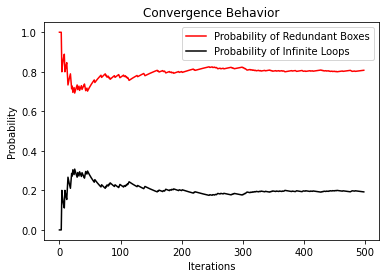

In [33]:
total_iterations = 0
total_redundant_boxes = 0
total_infinite_loops = 0

prob_redundant = []
prob_infinite = []

for i in range(1, 500): 
    box = initialize_box()
    iterations, redundant_boxes, infinite_loops = update_box(box.copy())
    total_iterations += iterations
    total_redundant_boxes += redundant_boxes
    total_infinite_loops += infinite_loops

    # Calculate probabilities
    prob_redundant.append(total_redundant_boxes / i)
    prob_infinite.append(total_infinite_loops / i)

# Plot the probabilities
plt.plot(prob_redundant, label='Probability of Redundant Boxes', color='red')
plt.plot(prob_infinite, label='Probability of Infinite Loops', color='black')
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Convergence Behavior')
plt.legend()
plt.show()
